In [1]:
import pandas as pd
import numpy as np
import os
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  


# Loading train and test data

In [3]:
dftrain = pd.read_csv("C:\\Users\\sacch\\OneDrive\\Documents\\Downloads\\train_av.csv")


In [35]:
dftrain.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [36]:
print(dftrain.isnull().values.any())

False


In [37]:
dftest = pd.read_csv("C:\\Users\\sacch\\OneDrive\\Documents\\Downloads\\test_av.csv")


In [48]:
dftest.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER if not already downloaded
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to assign sentiment label
def get_sentiment_label(tweet):
    score = sia.polarity_scores(tweet)["compound"]
    return 1 if score < 0 else 0  # 1 = Negative, 0 = Positive/Neutral

# Apply sentiment labeling
dftrain["label"] = dftrain["tweet"].apply(get_sentiment_label)

# Check class distribution
print(dftrain["label"].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sacch\AppData\Roaming\nltk_data...


label
0    13988
1     3209
Name: count, dtype: int64


In [50]:
cnt1 = len(dftrain[dftrain['label']==1])
cnt0 = len(dftrain[dftrain['label']==0])
pct0 = cnt0/(cnt1+cnt0)
print('percent 0',round(pct0*100,2))
pct1 = cnt1/(cnt0+cnt1)
print('percent 1',round(pct1*100,2))

percent 0 81.34
percent 1 18.66


C:\Users\sacch\AppData\Local\Temp\ipykernel_17708\984298328.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(dftrain['label']).plot.bar()


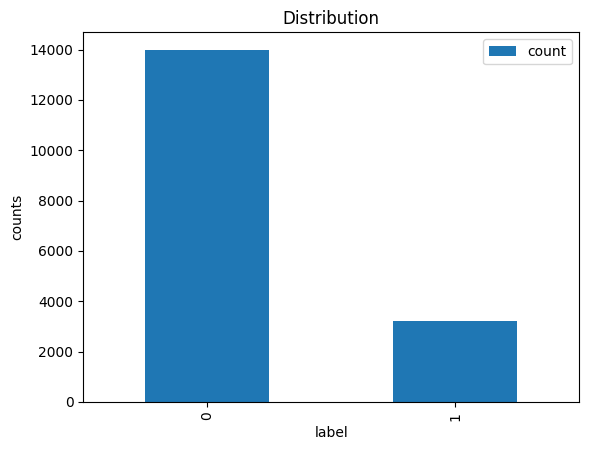

In [51]:
pd.value_counts(dftrain['label']).plot.bar()
plt.title('Distribution')
plt.xlabel('label')
plt.ylabel('counts')
plt.legend()
plt.show()

In [52]:
dftrain.shape

(17197, 3)

In [53]:
dftest.shape

(17197, 2)

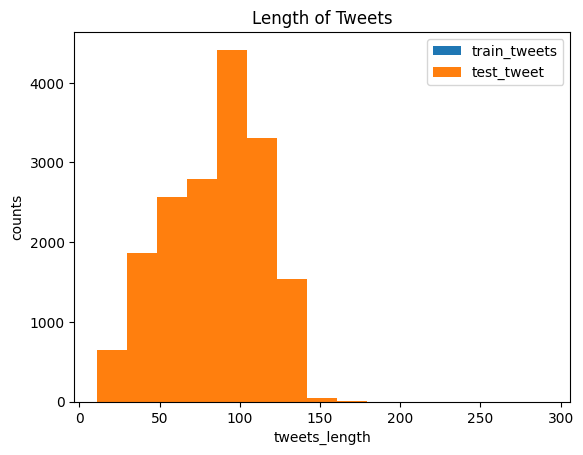

In [54]:
trainlen = dftrain['tweet'].str.len()
testlen = dftest['tweet'].str.len()
plt.hist(trainlen,label ='train_tweets',bins=15)
plt.hist(testlen,label = 'test_tweet',bins=15)
plt.title('Length of Tweets')
plt.xlabel('tweets_length')
plt.ylabel('counts')
plt.legend()
plt.show()

In [55]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
dftrain['word count'] = dftrain['tweet'].apply(word_count)
dftrain.head(3)

,id,tweet,label,word count
0,31963,#studiolife #aislife #requires #passion #dedic...,0,9
1,31964,@user #white #supremacists want everyone to s...,0,16
2,31965,safe ways to heal your #acne!! #altwaystohe...,0,9


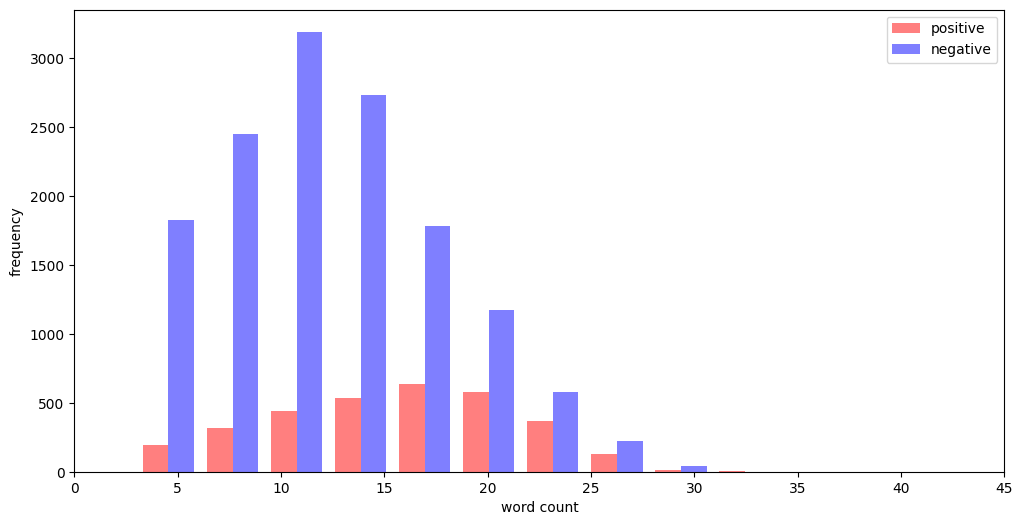

In [56]:
x = dftrain['word count'][dftrain.label == 1]
y = dftrain['word count'][dftrain.label == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [59]:
import joblib


In [61]:
from collections import Counter


In [62]:
all_words = []
for line in list(dftrain['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(10)    

[('@user', 9409),
 ('the', 5424),
 ('to', 5186),
 ('a', 3281),
 ('i', 3129),
 ('and', 2662),
 ('you', 2607),
 ('for', 2473),
 ('in', 2346),
 ('of', 2241)]

In [64]:
data = pd.concat([dftrain, dftest], ignore_index=True)


In [65]:
data.head()

,id,tweet,label,word count
0,31963,#studiolife #aislife #requires #passion #dedic...,0.0,9.0
1,31964,@user #white #supremacists want everyone to s...,0.0,16.0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.0,9.0
3,31966,is the hp and the cursed child book up for res...,0.0,22.0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.0,15.0


# Data Preprocessing
 # Remove @ symbol

In [66]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [67]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*") 
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sacch\AppData\Local\Temp\ipykernel_17708\2504478009.py:1: SyntaxWarning: invalid escape sequence '\w'
  data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")


,id,tweet,label,word count,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,0.0,9.0,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,0.0,16.0,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.0,9.0,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,0.0,22.0,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.0,15.0,"3rd #bihday to my amazing, hilarious #nephew..."


# Remove Punctuations,special symbols

In [68]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
data.head(10)

,id,tweet,label,word count,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,0.0,9.0,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,0.0,16.0,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.0,9.0,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,0.0,22.0,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.0,15.0,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips,0.0,5.0,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,0.0,12.0,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,0.0,4.0,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...,1.0,20.0,i will never understand why my dad left me...
9,31972,#delicious #food #lovelife #capetown mannaep...,0.0,6.0,#delicious #food #lovelife #capetown mannaep...


# Remove short words

In [69]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


# normalization

In [70]:
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [#studiolife, #aislife, #requires, #passion, #...
1    [#white, #supremacists, want, everyone, #birds...
2    [safe, ways, heal, your, #acne!!, #altwaystohe...
3    [cursed, child, book, reservations, already?, ...
4    [#bihday, amazing,, hilarious, #nephew, ahmir!...
Name: tidy_tweet, dtype: object

In [71]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

# Word Cloud

In [72]:
data['tidy_tweet']=tokenized_tweet

In [73]:
data['tidy_tweet'].head()

0    [#studiolif, #aislif, #requir, #passion, #dedi...
1    [#white, #supremacist, want, everyon, #birdsâ...
2    [safe, way, heal, your, #acne!!, #altwaystoh, ...
3    [curs, child, book, reserv, already?, yes,, wh...
4    [#bihday, amazing,, hilari, #nephew, ahmir!, u...
Name: tidy_tweet, dtype: object

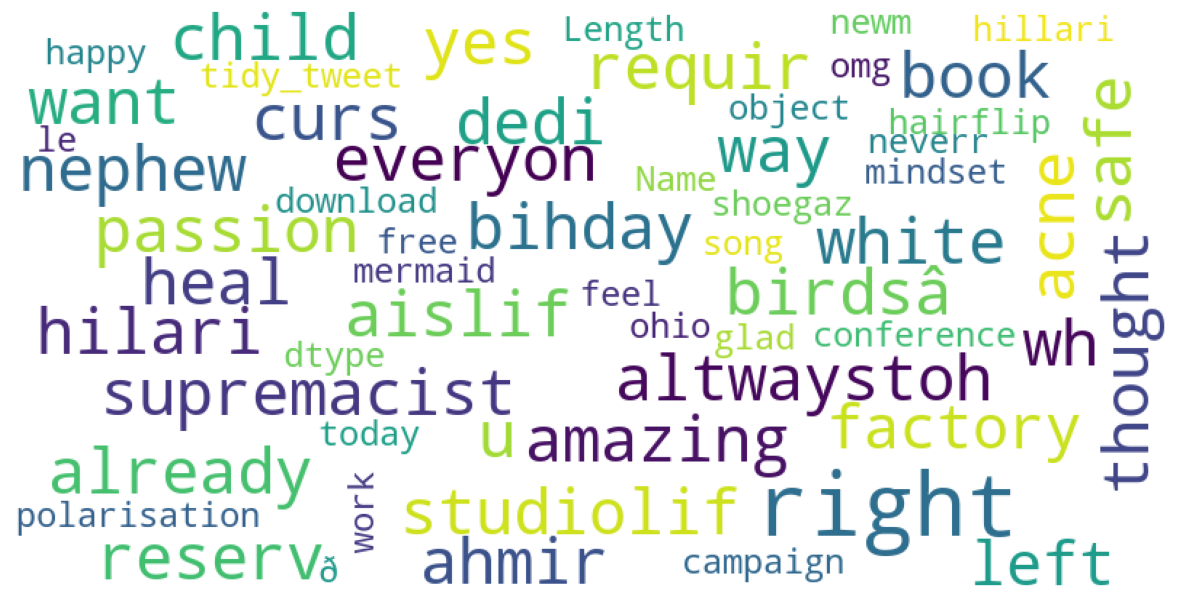

In [74]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(data['tidy_tweet'])

# word cloud for label 0

In [75]:
normal_words =' '.join([str(text) for text in data['tidy_tweet'][data['label'] == 0]]) 

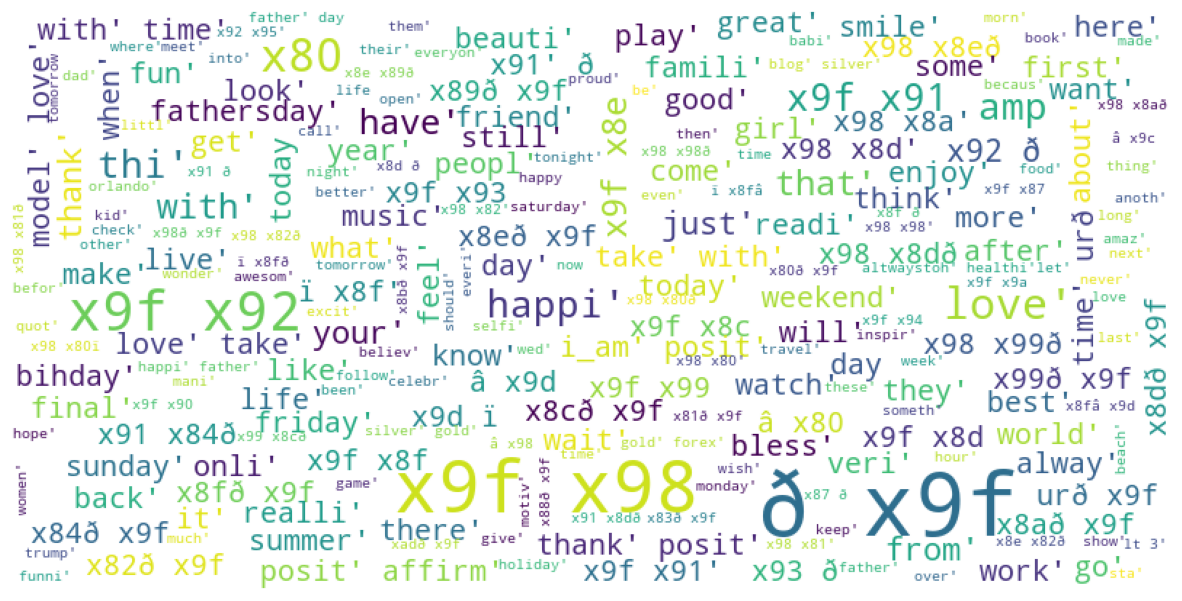

In [76]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(normal_words)

# word cloud for label 1

In [77]:
normal_words =' '.join([str(text) for text in data['tidy_tweet'][data['label'] == 1]]) 


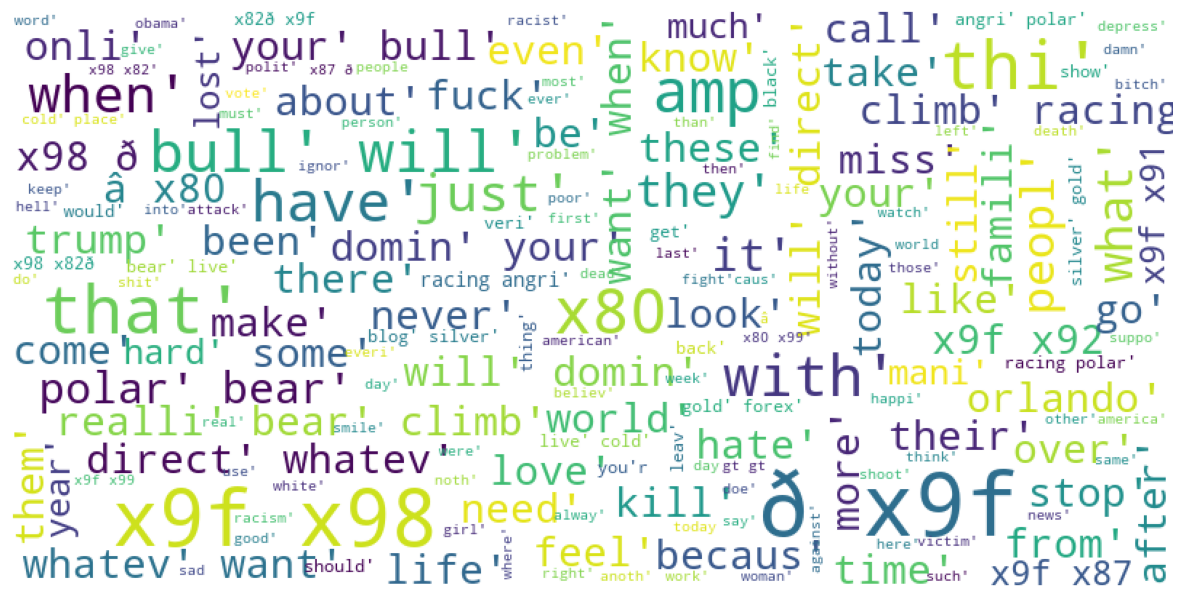

In [78]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(normal_words)

In [79]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
data['tidy_tweet'] = tokenized_tweet

In [80]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['tidy_tweet'])
bow.shape

(34394, 1000)

# TF-IDF

In [81]:
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

#import gensim

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(data['tidy_tweet']) 
tfidf.shape

(34394, 1000)